# Financial Planning with API's and Simulations

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the enviroment variables from the .env file
load_dotenv()

True

In [3]:
#Displaying the function of MCSimulation
?MCSimulation

## Emergency Financial Planner

### Evaluating the Cryptocurrency Wallet

In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio
btc_coins = 1.2
eth_coins = 5.3

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000

In [6]:
# The free Crypto API Call, we are going to use
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Using the requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

#Use the json.dumps function to review the response. Indent changes indention and sort_keys sets them in their relative groups
print(json.dumps(btc_response,
                 indent=4,
                 sort_keys=True)
     )

{
    "data": {
        "1": {
            "circulating_supply": 18950562,
            "id": 1,
            "last_updated": 1644175789,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 790708236225,
                    "percent_change_1h": 0.25748460512122,
                    "percent_change_24h": 0.11474270265366,
                    "percent_change_7d": 9.13526837513019,
                    "percentage_change_1h": 0.25748460512122,
                    "percentage_change_24h": 0.11474270265366,
                    "percentage_change_7d": 9.13526837513019,
                    "price": 41725.0,
                    "volume_24h": 12169980233
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18950562,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 

In [8]:
# Using the requests library, make an API call to access the current price of ETH
eth_response = requests.get(eth_url).json()

#Use the json.dumps function to review the response
print(json.dumps(eth_response,
                 indent=4,
                 sort_keys=True)
     )

{
    "data": {
        "1027": {
            "circulating_supply": 119472093,
            "id": 1027,
            "last_updated": 1644175797,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 357815161064,
                    "percent_change_1h": 0.152677887098137,
                    "percent_change_24h": -0.448057273261845,
                    "percent_change_7d": 15.3014986165163,
                    "percentage_change_1h": 0.152677887098137,
                    "percentage_change_24h": -0.448057273261845,
                    "percentage_change_7d": 15.3014986165163,
                    "price": 3001.99,
                    "volume_24h": 8388575005
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119472093,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [9]:
# Navigating the BTC response object to acces the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the brice of BTC
print(f"The current price of Bitcoin: ${btc_price}.")

The current price of Bitcoin: $41725.0.


In [10]:
# Navigating the BTC response object to acces the current price of BTC
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price of Ethereum: ${eth_price}.")

The current price of Ethereum: $3001.99.


In [11]:
# The value of BTC the portfolio holds:
btc_value = btc_coins * btc_price

print(f"The value of Bitcoin in the portfolio: ${btc_value}.")

The value of Bitcoin in the portfolio: $50070.0.


In [12]:
# The value of ETH the portfolio holds
eth_value = eth_coins * eth_price

# Print the value of ETH
print(f"The value of Ethereum in the portfolio: ${eth_value}.")

The value of Ethereum in the portfolio: $15910.546999999999.


In [13]:
# The total value of the cryptocurrency wallet (Add the value of the BTC holding and ETH holding)
total_crypto_wallet = eth_value + btc_value
# Print the current cryptocurrency wallet balance
print(f"The total value of the cryptocurrency wallet: ${total_crypto_wallet}.")

The total value of the cryptocurrency wallet: $65980.54699999999.


### Evaluating the Stock and Bond Holdings

In [14]:
# The current amount of shares held in both the stock (SPY) and bond (AGG) of the portfolio
spy_shares = 110
agg_shares = 200

In [15]:
# Setting the variable for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key,
                      alpaca_secret_key,
                      api_version="v2"
                      )

In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

#Set the timeframe to '1D'
timeframe = '1D'

#Format the current date as ISO format
start_date = pd.Timestamp('2022-01-31', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2022-02-05', tz='America/Chicago').isoformat()

In [17]:
# Using the Alpaca get_barset function get the current closing prices
prices_df = alpaca.get_barset(tickers,
                              timeframe,
                              start=start_date,
                              end=end_date
                                     ).df
# View the first 5 rows of the Alpaca DataFrame
display(prices_df.tail(5))

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  """


AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.56   6762828   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976  
2022-02-03 00:00:00-05:00  450.95  452.97  445.7100  446.640   99110054  
2022-02-04 00:00:00-05:00  446.35  452.78  443.8300  448.730   98775229

In [27]:
# Access the closing price for AGG from the DataFrame
agg_closing_price = prices_df['AGG']['close']

# View the closing price of AGG
display(agg_closing_price)

time
2022-01-31 00:00:00-05:00    111.78
2022-02-01 00:00:00-05:00    111.59
2022-02-02 00:00:00-05:00    111.72
2022-02-03 00:00:00-05:00    111.27
2022-02-04 00:00:00-05:00    110.56
Name: close, dtype: float64

In [29]:
# Access the closing price for SPY from the DataFrame
spy_closing_price = prices_df['SPY']['close']

# View the closing price of SPY
display(spy_closing_price)

time
2022-01-31 00:00:00-05:00    449.815
2022-02-01 00:00:00-05:00    452.960
2022-02-02 00:00:00-05:00    457.300
2022-02-03 00:00:00-05:00    446.640
2022-02-04 00:00:00-05:00    448.730
Name: close, dtype: float64

In [31]:
# Calculate the current value of the bond portion of the portfolio
agg_value = float(agg_shares) * agg_closing_price[4]

# Print the current value
print(f"The value of iShares Core US Aggregate Bond ETF in the portfolio: ${agg_value}.")

The value of iShares Core US Aggregate Bond ETF in the portfolio: $22112.0.


In [30]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_closing_price[4]

# Print the current value
print(f"The value of SPDR S&P 500 ETF Trust in the portfolio: ${spy_value}.")

The value of SPDR S&P 500 ETF Trust in the portfolio: $49360.3.


In [34]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of both stock and bond portion of the portfolio
print(f"The total balance of both AGG and SPY: ${total_stocks_bonds}.")

The total balance of both AGG and SPY: $71472.3.


In [50]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current balance of the portfolio
print(f"The total balance of the portfolio: ${total_portfolio}.")

The total balance of the portfolio: $137452.847.


### Evaluation of the Emergency Fund

In [43]:
# Create a Python list that holds the financial assets
savings_data = ["Total Crypto Value", "Total Stocks and Bonds Value"]

# Review the Python list savings_data
print(savings_data)

['Total Crypto Value', 'Total Stocks and Bonds Value']


In [44]:
# Create a Pandas Dataframe 
savings_df = pd.DataFrame({"Amount": [total_crypto_wallet, total_stocks_bonds]}, index=savings_data)

# Disply the DataFrame
display(savings_df)

,Amount
Total Crypto Value,65980.547
Total Stocks and Bonds Value,71472.300


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

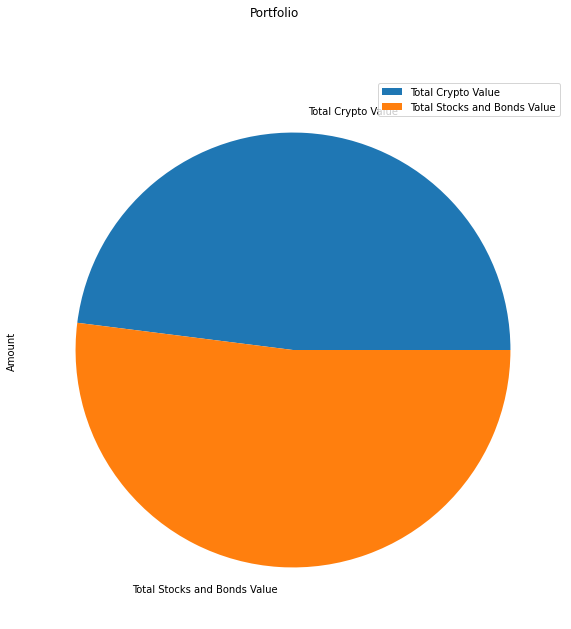

In [45]:
# Plot the total value in a pie chart
savings_df.plot.pie(subplots=True, figsize=(20,10), title="Portfolio")

In [49]:
# A variable that holds 3 * the monthly_income
emergency_fund_value = 3 * monthly_income

In [52]:
# Evaluate the possibility of creating an emergency fund with 3 conditions
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You reached the important financial goal!")
else:
    print(f"You're ${total_portfolio - emergency_fund_value} from reaching the goal.")

Congratulations! You have enough money in this fund.


# Financial Planner for Retirement
## Monte Carlo Simulation

In [56]:
# Set start and end dates of 3 years from the current date
start_date = pd.Timestamp('2019-02-06', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2022-02-06', tz='America/Chicago').isoformat()

# Set teh rows to 1000
rows = 1000

In [58]:
# Make the API call
prices_df = alpaca.get_barset(tickers,
                              timeframe,
                              start=start_date,
                              end=end_date,
                              limit=rows
                                     ).df

# Display both first and last 5 rows
display(prices_df.head())
display(prices_df.tail())

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                         \
                             open      high       low     close   volume   
time                                                                       
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441  6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500  3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550  2988674   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999  2686282   
2019-02-12 00:00:00-05:00  107.22  107.2300  107.1217  107.2300  2259787   

                              SPY                                       
                             open      high     low    close    volume  
time                                                                    
2019-02-06 00:00:00-05:00  272.79  273.3400  271.92  272.700  43446324  
2019-02-07 00:00:00-05:00  270.94  271.5500  268.29  269.970  83380785  
2019-02-08 00:00:00-05:00  268.75  270.2874  267.83  270.080  63409417  
2019-02-11 00:00:00-05:00  271.20  271.4900  270.03  270.640  57175393  
2019-02-12 00:00:00-05:00  272.42  274.5200  272.34  274.075  60116740

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.56   6762828   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976  
2022-02-03 00:00:00-05:00  450.95  452.97  445.7100  446.640   99110054  
2022-02-04 00:00:00-05:00  446.35  452.78  443.8300  448.730   98775229

### Run a Monte Carlo Simulation to forecast 30 years

In [75]:
# Configure the Monte Carlo simulation
# The weights should be split 40% to AGG and 60% to SPY
MC_Sim = MCSimulation(portfolio_data = prices_df, weights=[.6, .4], num_simulation=500 ,num_trading_days=252*30)

# Review the simulation data
display(MC_Sim.portfolio_data)

AGG                                          \
                             open      high       low     close    volume   
time                                                                        
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441   6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500   3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550   2988674   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999   2686282   
2019-02-12 00:00:00-05:00  107.22  107.2300  107.1217  107.2300   2259787   
...                           ...       ...       ...       ...       ...   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.7800  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.5900   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.7200   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.2700   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.5600   6762828   

                                           SPY                               \
                          daily_return    open      high       low    close   
time                                                                          
2019-02-06 00:00:00-05:00          NaN  272.79  273.3400  271.9200  272.700   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.2900  269.970   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.8300  270.080   
2019-02-11 00:00:00-05:00    -0.001445  271.20  271.4900  270.0300  270.640   
2019-02-12 00:00:00-05:00     0.000281  272.42  274.5200  272.3400  274.075   
...                                ...     ...       ...       ...      ...   
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.2800  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.6300  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.1200  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.9700  445.7100  446.640   
2022-02-04 00:00:00-05:00    -0.006381  446.35  452.7800  443.8300  448.730   

                                                   
                              volume daily_return  
time                                               
2019-02-06 00:00:00-05:00   43446324          NaN  
2019-02-07 00:00:00-05:00   83380785    -0.010011  
2019-02-08 00:00:00-05:00   63409417     0.000407  
2019-02-11 00:00:00-05:00   57175393     0.002073  
2019-02-12 00:00:00-05:00   60116740     0.012692  
...                              ...          ...  
2022-01-31 00:00:00-05:00  128202383     0.017865  
2022-02-01 00:00:00-05:00  106515279     0.006992  
2022-02-02 00:00:00-05:00   97807976     0.009581  
2022-02-03 00:00:00-05:00   99110054    -0.023311  
2022-02-04 00:00:00-05:00   98775229     0.004679  

[757 rows x 12 columns]

In [76]:
# Run the Monte Carlo Simulation to forecast 30 years Cumulative returns
MC_Sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/angelreyes/Desktop/Emergency_Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995698,1.000129,1.002084,1.005295,0.995045,1.005287,1.001078,1.006712,0.995932,0.995874,...,0.992766,0.998159,0.996555,1.006432,0.996953,0.998698,1.006559,1.008218,1.001466,1.001538
2,0.993412,0.996288,1.010172,1.009183,0.979834,1.013793,1.001672,1.003182,0.994749,0.983038,...,0.994504,0.995516,0.998299,1.008741,0.994712,1.003764,1.002874,1.018870,1.000581,0.997021
3,0.989522,0.990811,1.003013,1.003611,0.980518,1.011574,1.009095,1.005396,1.009143,0.995597,...,0.994394,0.990710,0.990489,1.007084,1.000071,1.001748,1.007465,1.017121,1.003200,0.996215
4,0.990932,0.986661,1.005709,1.007274,0.977750,1.014951,1.012008,1.001008,1.013605,0.999977,...,1.001310,0.995025,0.988952,1.008027,1.005223,0.993968,1.010552,1.011932,1.003188,1.000082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.810969,22.159898,7.712724,5.539460,24.356552,5.821709,15.866341,12.233370,22.278316,13.345986,...,11.463980,13.754895,11.035647,13.721926,21.327920,16.801673,5.903741,5.254706,9.970893,26.147666
7557,9.736963,22.118386,7.812007,5.588135,24.459982,5.817570,15.971899,12.212541,22.362386,13.394728,...,11.506370,13.760202,11.045854,13.792727,21.402351,16.886844,5.872669,5.294079,9.966940,26.002248
7558,9.704888,22.152949,7.726923,5.610528,24.789776,5.838740,15.898650,12.153017,22.121852,13.219168,...,11.538954,13.876281,10.959136,13.809608,21.547944,16.930350,5.850237,5.311529,10.019697,25.883556
7559,9.743140,22.298604,7.701543,5.628419,24.825663,5.882590,16.025543,12.085721,22.360570,13.412984,...,11.590602,13.848189,11.007141,13.848470,21.555120,16.902252,5.801096,5.292660,9.959987,26.048165


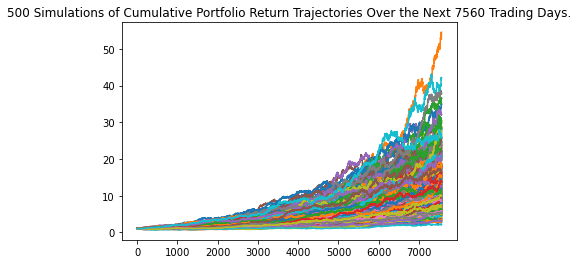

In [77]:
# Visualize the Monte Carlo Simulation in a line plot
mc_line_sim = MC_Sim.plot_simulation()

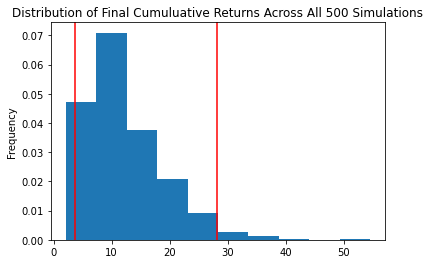

In [78]:
# Visualize the Monte Carlo Simulation in a histogram 
mc_sim_distribution = MC_Sim.plot_distribution()

In [79]:
# Generate summary statistics from the Monte Carlo simulation
mc_sim_summary = MC_Sim.summarize_cumulative_return()

# Display the summary
display(mc_sim_summary)

count           500.000000
mean             12.302698
std               6.710846
min               2.110032
25%               7.387851
50%              10.764814
75%              15.378230
max              54.550630
95% CI Lower      3.761474
95% CI Upper     28.236362
Name: 7560, dtype: float64

In [80]:
# Print the current balance of both stock and bond portion of the portfolio
print(f"The total balance of both AGG and SPY: ${total_stocks_bonds}.")

The total balance of both AGG and SPY: $71472.3.


## Analyze the Retirement Portfolio Forecast

In [81]:
# Use the 95% CI Lower and Upper to calculate the range of the possible outcomes for the current stocks/bonds Portfolio
ci_lower_30_cum_return = mc_sim_summary[8] * total_stocks_bonds
ci_upper_30_cum_return = mc_sim_summary[9] * total_stocks_bonds

# Print the results
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an even weight portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_30_cum_return: .2f} and ${ci_upper_30_cum_return: .2f}.")


There is a 95% chance that an initial investment of $71472.3 in the portfolio with an even weight portfolio over the next 30 years will end within in the range of $ 268841.19 and $ 2018117.73.


### Run a Monte Carlo Simulation to forecast 10 years

In [82]:
# Configure the Monte Carlo simulation
# The weights should be split 20% to AGG and 80% to SPY
MC_Sim = MCSimulation(portfolio_data = prices_df, weights=[.8, .2], num_simulation=500 ,num_trading_days=252*10)

# Review the simulation data
display(MC_Sim.portfolio_data)

AGG                                          \
                             open      high       low     close    volume   
time                                                                        
2019-02-06 00:00:00-05:00  107.20  107.2200  106.9850  107.0441   6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.0300  107.1500   3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.1700  107.3550   2988674   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.1500  107.1999   2686282   
2019-02-12 00:00:00-05:00  107.22  107.2300  107.1217  107.2300   2259787   
...                           ...       ...       ...       ...       ...   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.7800  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.5900   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.7200   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.2700   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.5600   6762828   

                                           SPY                               \
                          daily_return    open      high       low    close   
time                                                                          
2019-02-06 00:00:00-05:00          NaN  272.79  273.3400  271.9200  272.700   
2019-02-07 00:00:00-05:00     0.000989  270.94  271.5500  268.2900  269.970   
2019-02-08 00:00:00-05:00     0.001913  268.75  270.2874  267.8300  270.080   
2019-02-11 00:00:00-05:00    -0.001445  271.20  271.4900  270.0300  270.640   
2019-02-12 00:00:00-05:00     0.000281  272.42  274.5200  272.3400  274.075   
...                                ...     ...       ...       ...      ...   
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.2800  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.6300  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.1200  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.9700  445.7100  446.640   
2022-02-04 00:00:00-05:00    -0.006381  446.35  452.7800  443.8300  448.730   

                                                   
                              volume daily_return  
time                                               
2019-02-06 00:00:00-05:00   43446324          NaN  
2019-02-07 00:00:00-05:00   83380785    -0.010011  
2019-02-08 00:00:00-05:00   63409417     0.000407  
2019-02-11 00:00:00-05:00   57175393     0.002073  
2019-02-12 00:00:00-05:00   60116740     0.012692  
...                              ...          ...  
2022-01-31 00:00:00-05:00  128202383     0.017865  
2022-02-01 00:00:00-05:00  106515279     0.006992  
2022-02-02 00:00:00-05:00   97807976     0.009581  
2022-02-03 00:00:00-05:00   99110054    -0.023311  
2022-02-04 00:00:00-05:00   98775229     0.004679  

[757 rows x 12 columns]

In [83]:
# Run the Monte Carlo Simulation to forecast 10 years Cumulative returns
MC_Sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/angelreyes/Desktop/Emergency_Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000332,1.000780,1.000347,0.998874,0.993853,1.003369,0.997771,0.997310,1.004248,0.997979,...,1.002992,0.998720,1.005454,1.003579,0.996569,1.002800,1.000014,0.995812,0.998888,1.000602
2,0.994734,1.003768,0.995385,1.004180,0.997620,1.003998,1.000788,1.001620,1.006214,1.004392,...,1.008898,0.996876,1.002736,1.003759,0.992263,1.001186,1.001407,1.001731,0.996471,0.995522
3,0.997791,1.004417,0.999003,1.006064,0.994929,1.005215,1.006281,1.012429,1.011670,1.005893,...,1.014094,0.998133,0.999848,1.000731,0.986975,1.012385,1.003087,0.999509,0.999023,0.999125
4,0.995110,1.007753,0.999386,1.011626,0.994403,1.006798,1.007631,1.011407,1.012642,1.005429,...,1.017772,0.997721,0.998906,1.003187,0.985354,1.013721,1.001701,0.999480,0.994412,1.001379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.247671,1.858146,1.639336,1.588707,1.346250,1.818161,1.430774,1.741354,1.626638,1.211028,...,2.191249,1.281253,1.201170,1.949924,1.078457,1.790745,1.918143,1.523908,1.952360,1.393267
2517,1.254614,1.864066,1.644011,1.594530,1.344371,1.821489,1.434647,1.742087,1.631431,1.208694,...,2.187343,1.277744,1.206770,1.951526,1.074825,1.789285,1.912735,1.522234,1.957789,1.392686
2518,1.255946,1.857896,1.642932,1.584723,1.348358,1.835220,1.441070,1.740171,1.632336,1.212406,...,2.190799,1.281727,1.208760,1.967429,1.081745,1.792559,1.905894,1.531658,1.955851,1.381937
2519,1.256489,1.850434,1.642562,1.587005,1.342772,1.837120,1.445935,1.753665,1.634152,1.220974,...,2.189718,1.286005,1.198318,1.976819,1.082364,1.799726,1.891042,1.531163,1.940003,1.379363


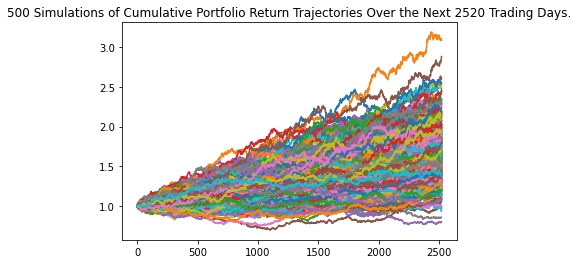

In [84]:
# Visualize the Monte Carlo Simulation in a line plot
mc_line_sim = MC_Sim.plot_simulation()

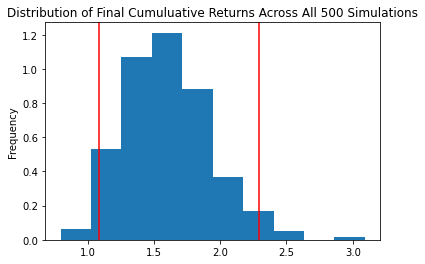

In [85]:
# Visualize the Monte Carlo Simulation in a histogram 
mc_sim_distribution = MC_Sim.plot_distribution()

In [86]:
# Generate summary statistics from the Monte Carlo simulation
mc_sim_summary = MC_Sim.summarize_cumulative_return()

# Display the summary
display(mc_sim_summary)

count           500.000000
mean              1.612033
std               0.324300
min               0.796530
25%               1.387498
50%               1.598739
75%               1.810954
max               3.091192
95% CI Lower      1.085890
95% CI Upper      2.296214
Name: 2520, dtype: float64

In [87]:
# Use the 95% CI Lower and Upper to calculate the range of the possible outcomes for the current stocks/bonds Portfolio
ci_lower_10_cum_return = mc_sim_summary[8] * total_stocks_bonds
ci_upper_10_cum_return = mc_sim_summary[9] * total_stocks_bonds

# Print the results
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an even weight portfolio over the next 10 years will end within in the range of"
      f" ${ci_lower_10_cum_return: .2f} and ${ci_upper_10_cum_return: .2f}.")



There is a 95% chance that an initial investment of $71472.3 in the portfolio with an even weight portfolio over the next 10 years will end within in the range of $ 77611.07 and $ 164115.69.
